# Chapter 5 - Perform Your First Cluster Analysis

Build your first unsupervised models with the most popular clustering algorithms

## Activity: Anomaly detection with k-means

You are working for a big international bank. The Credit department is reviewing their offerings and wants to get a better understanding of their current customers. You have been tasked to perform a customer segmentation analysis. You will perform a cluster analysis with k-means to identify groups of similar customers.

Students are expected to:
* Download and load the dataset into Python
* Perform data standardisation if required
* Analyse and define the optimal number of clusters
* Fit k-means with default hyperparameters
* Plot the clusters and their centroids
* Tune hyperparameters and re-train k-means
* Analyse and interpret clusters found

The dataset used has been shared by Dheeru Dua and Casey Graff from the University of California.

It is available here: [https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric](https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric)


Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Notes:
* This dataset is a .dat file format. You can still load the file using **read_csv()** but you will need the specify the right separator characters with the parameter **sep**.
* Even though all the columns in this dataset are integers, most of them are actually categorical variables. The data in these columns are not continuous. Only 2 variables are really numeric. Find and use them for your clustering.


In [0]:
import pandas as pd
from sklearn.cluster import KMeans
import altair as alt
from sklearn.preprocessing import StandardScaler

In [0]:
file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric'
df = pd.read_csv(file_url, header=None, sep='\s\s+', prefix='X')
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
0,1,6,4,12,5,5,3,4,1,67,3,2,1,2,1,0,0,1,0,0,1,0,0,1,1.0
1,2,48,2,60,1,3,2,2,1,22,3,1,1,1,1,0,0,1,0,0,1,0,0,1,2.0
2,4,12,4,21,1,4,3,3,1,49,3,1,2,1,1,0,0,1,0,0,1,0,1,0,1.0
3,1,42,2,79,1,4,3,4,2,45,3,1,2,1,1,0,0,0,0,0,0,0,0,1,1.0
4,1,24,3,49,1,3,3,4,4,53,3,2,2,1,1,1,0,1,0,0,0,0,0,1,2.0


In [0]:
X = df[['X3', 'X9']]
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)

In [0]:
clusters = pd.DataFrame()
clusters['cluster_range'] = range(1, 15)
inertia = []
for k in clusters['cluster_range']:
    kmeans = KMeans(n_clusters=k).fit(X_scaled)
    inertia.append(kmeans.inertia_)
clusters['inertia'] = inertia
clusters

,cluster_range,inertia
0,1,2000.000000
1,2,1280.677930
2,3,767.637196
3,4,576.086134
4,5,443.899592
5,6,360.453030
6,7,291.393050
7,8,252.780852
8,9,219.472224
9,10,193.264473


In [0]:
!pip install kneed

4


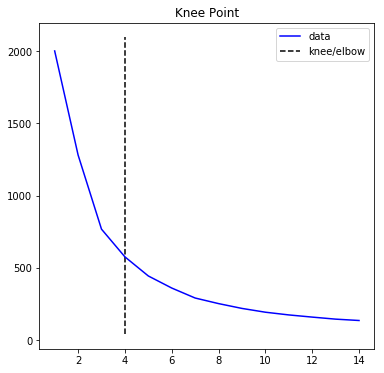

In [0]:
from kneed import KneeLocator

kn = KneeLocator(clusters['cluster_range'], clusters['inertia'], curve='convex', direction='decreasing')
clusters_number = kn.knee
print(clusters_number)

kn.plot_knee()

In [0]:
kmeans = KMeans(random_state=1, n_clusters=clusters_number, init='k-means++', n_init=50, max_iter=1000)
kmeans.fit(X_scaled)
df['cluster'] = kmeans.predict(X_scaled)

In [0]:
scatter_plot = alt.Chart(df).mark_circle()
scatter_plot.encode(x='X3', y='X9',color='cluster:N')

Chart({
  data:      X0  X1     X2  X3  X4  X5  X6  ...  X19  X20  X21  X22  X23  X24  cluster
  0     1   6      4  12   5   5   3  ...    0    1    0    0    1  1.0        2
  1     2  48      2  60   1   3   2  ...    0    1    0    0    1  2.0        1
  2     4  12      4  21   1   4   3  ...    0    1    0    1    0  1.0        2
  3     1  42      2  79   1   4   3  ...    0    0    0    0    1  1.0        1
  4     1  24      3  49   1   3   3  ...    0    0    0    0    1  2.0        2
  5     4  36      2  91   5   3   3  ...    0    0    0    1    0  1.0        1
  6     4  24      2  28   3   5   3  ...    0    1    0    0    1  1.0        2
  7     2  36      2  69   1   3   3  ...    1    0    0    0    0  1.0        1
  8     4  12      2  31   4   4   1  ...    0    1    0    1    0  1.0        2
  9     2  30      4  52   1   1   4  ...    0    1    0    0    0  2.0        1
  10    2  12      2  13   1   2   2  ...    1    0    0    0    1  2.0        0
  11    1  48      2  43   1   2   2  ...    1    0    0    0    1  2.0        0
  12    2  12      2  16   1   3   2  ...    0    1    0    0    1  1.0        0
  13    1  24      4  12   1   5   3  ...    0    1    0    1    0  2.0        2
  14    1  15      2  14   1   3   2  ...    1    0    0    0    1  1.0        0
  15    1  24      2  13   2   3   2  ...    0    1    0    1    0  2.0        0
  16    4  24      4  24   5   5   3  ...    0    1    0    0    1  1.0        2
  17    1  30      0  81   5   2   3  ...    0    1    0    0    1  1.0        1
  18    2  24  2 126   1   5   2   2  ...    0    0    0    0    2  NaN        3
  19    4  24      2  34   3   5   3  ...    0    1    0    0    1  1.0        0
  20    4   9      4  21   1   3   3  ...    0    1    0    0    1  1.0        2
  21    1   6      2  26   3   3   3  ...    1    0    0    0    1  1.0        2
  22    1  10      4  22   1   2   3  ...    1    0    0    1    0  1.0        2
  23    2  12      4  18   2   2   3  ...    0    1    0    0    1  1.0        2
  24    4  10      4  21   5   3   4  ...    0    1    0    0    1  1.0        0
  25    1   6      2  14   1   3   3  ...    0    1    0    1    0  1.0        0
  26    4   6      0   4   1   5   4  ...    0    1    0    1    0  1.0        0
  27    3  12      1   4   4   3   2  ...    1    0    0    0    1  1.0        2
  28    2   7      2  24   1   3   3  ...    0    1    0    0    1  1.0        0
  29    1  60      3  68   1   5   3  ...    0    1    0    0    1  2.0        1
  ..   ..  ..    ...  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...      ...
  970   2  15      2  15   2   3   3  ...    0    1    0    0    1  1.0        0
  971   4  24      2  74   1   3   3  ...    0    1    0    1    0  1.0        1
  972   1  24      1  12   1   1   2  ...    1    0    1    0    0  2.0        0
  973   1  60      2  73   1   5   3  ...    1    0    0    0    1  2.0        1
  974   4  30      4  28   1   3   2  ...    0    1    0    0    1  1.0        0
  975   3  24      2  13   3   3   2  ...    0    1    0    1    0  1.0        2
  976   2   6      2   8   1   3   2  ...    0    1    0    0    1  1.0        2
  977   2  18      3  24   5   5   3  ...    0    1    0    0    1  1.0        2
  978   4  24      3  25   1   5   3  ...    0    1    0    1    0  2.0        2
  979   2  15      1  13   2   3   4  ...    1    0    0    0    1  2.0        0
  980   2  30      4  84   1   4   3  ...    0    1    0    0    1  2.0        1
  981   4  48      2  48   1   1   3  ...    1    0    0    0    0  2.0        1
  982   3  21      2  29   2   3   2  ...    0    1    0    0    0  1.0        0
  983   1  36      2  82   1   3   3  ...    0    1    0    0    1  2.0        1
  984   4  24      4  20   1   4   3  ...    0    1    0    1    0  1.0        0
  985   1  15      4  14   1   3   2  ...    1    0    0    0    1  1.0        0
  986   3  42      0  63   1   2   1  ...    0    1    0    0    1  1.0        1
  987   4  13    